In [15]:
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import matplotlib.pyplot as plt
import numpy as np
import random

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation
from keras.datasets import cifar10

In [18]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# def unpickle(file):
#     import pickle
#     with open(file, 'rb') as fo:
#         dict = pickle.load(fo, encoding='bytes')
#     return dict

In [19]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
# x_train = x_train.reshape((50000,32*32*3))
# x_test = x_test.reshape((10000,32*32*3))

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train.shape

(50000, 32, 32, 3)

In [10]:
x_train[0]

array([0.23137255, 0.24313726, 0.24705882, ..., 0.48235294, 0.36078432,
       0.28235295], dtype=float32)

In [37]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [38]:
print(y_train.shape)
print(y_train[:10])

(50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


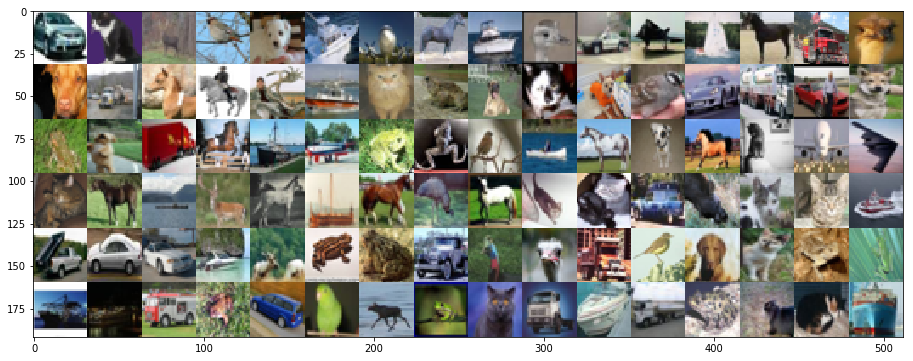

In [31]:
samples = np.concatenate(
    [np.concatenate(
        [x_train[i].reshape((32,32,3)) for i in [int(random.random() * len(x_train)) for i in range(16)]], axis=1) 
     for i in range(6)], axis=0)
plt.figure(figsize=(16,6))
plt.imshow(samples, cmap='gray')

In [42]:
model = Sequential()

# model.add(Dense(256, activation='sigmoid', input_dim=32*32*3))
# model.add(Dense(256, activation='sigmoid'))
# model.add(Dense(10, activation='softmax'))


model.add(Conv2D(64, (3,3), input_shape=(32,32,3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
activation_11 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
activation_12 (Activation)   (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
__________

In [43]:
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

In [44]:
model.fit(x_train, y_train, 
          batch_size=128, 
          epochs=30, 
          verbose=1, 
          validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.3089 - acc: 0.0974 - val_loss: 2.3039 - val_acc: 0.1000
Epoch 2/30
50000/50000 [==============================] - 5s 93us/step - loss: 2.3037 - acc: 0.0981 - val_loss: 2.3041 - val_acc: 0.1000
Epoch 3/30
50000/50000 [==============================] - 5s 93us/step - loss: 2.3034 - acc: 0.1006 - val_loss: 2.3033 - val_acc: 0.1000
Epoch 4/30
50000/50000 [==============================] - 5s 93us/step - loss: 2.3033 - acc: 0.1024 - val_loss: 2.3032 - val_acc: 0.1000
Epoch 5/30
50000/50000 [==============================] - 5s 93us/step - loss: 2.3031 - acc: 0.1019 - val_loss: 2.3029 - val_acc: 0.1000
Epoch 6/30
50000/50000 [==============================] - 5s 93us/step - loss: 2.3031 - acc: 0.1009 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 7/30
50000/50000 [==============================] - 5s 93us/step - loss: 2.3028 - acc: 0.1006 - val_loss: 2.3032 - val_acc

In [41]:
score = model.evaluate(x_test, y_test)
score

10000/10000 [==============================] - 1s 80us/step


[1.042394548892975, 0.6663]

### Run on GPU : GTX1080 : Full Dense Layers

Train on 50000 samples, validate on 10000 samples

Epoch 50/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7081 - acc: 0.3995 - val_loss: 1.7047 - val_acc: 0.3993

### Run on GPU : GTX1080 : Convolution Layers Added : Sigmoid Activation : BatchSize = 128 / Epochs = 30
#### Vanishing Gradiant

Train on 50000 samples, validate on 10000 samples

Epoch 50/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.1078 - acc: 0.2444 - val_loss: 2.0924 - val_acc: 0.2544

### Run on GPU : GTX1080 : Convolution Layers Added : reLU Activation : BatchSize = 128 / Epochs = 30

Train on 50000 samples, validate on 10000 samples

Epoch 50/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.5681 - acc: 0.8036 - val_loss: 1.0424 - val_acc: 0.6663
